In [8]:
import pandas as pd

In [9]:
dados_pacientes = pd.read_json('/content/pacientes.json')

In [10]:
dados_pacientes

,ID_paciente,Doenca_cardiaca,IMC,Fumante,Consumo_alcool,AVC,Saude_fisica,Saude_mental,Dificuldade_caminhar,Sexo_biologico,Faixa_etaria,Raca,Diabetes,Atividade_fisica,Saude_geral,Horas_sono,Asma,Doenca_renal,Cancer_pele
0,0,Nao,16.60,Sim,Nao,Nao,3,30,Nao,Feminino,55-59,Branca,Sim,Sim,Muito boa,5,Sim,Nao,Sim
1,1,Nao,20.34,Nao,Nao,Sim,0,0,Nao,Feminino,80 ou +,Branca,Nao,Sim,Muito boa,7,Nao,Nao,Nao
2,2,Nao,26.58,Sim,Nao,Nao,20,30,Nao,Masculino,65-69,Branca,Sim,Sim,Razoavel,8,Sim,Nao,Nao
3,3,Nao,24.21,Nao,Nao,Nao,0,0,Nao,Feminino,75-79,Branca,Nao,No,Boa,6,Nao,Nao,Sim
4,4,Nao,23.71,Nao,Nao,Nao,28,0,Sim,Feminino,40-44,Branca,Nao,Sim,Muito boa,8,Nao,Nao,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Nao,28.29,Sim,Nao,Nao,10,20,Nao,Feminino,65-69,Preta,Sim,Sim,Razoavel,8,Nao,Nao,Nao
996,996,Nao,25.69,Sim,Nao,Nao,0,0,Nao,Feminino,75-79,Branca,Nao,Sim,Excelente,8,Nao,Nao,Nao
997,997,Sim,26.99,Nao,Nao,Nao,1,0,Nao,Masculino,70-74,Branca,Nao,Sim,Muito boa,8,Nao,Nao,Nao
998,998,Nao,44.29,Nao,Nao,Nao,30,0,Sim,Feminino,70-74,Branca,Sim,No,Boa,6,Sim,Nao,Nao


In [12]:
dados_pacientes_2 = pd.read_json('/content/pacientes_2.json')

In [9]:
dados_pacientes_2

,Pesquisa,Ano,Pacientes
0,Principais Indicadores de Doenca Cardiaca,2020,"{'ID': '01', 'Faixa_etaria': '55-59', 'Sexo_bi..."
1,Principais Indicadores de Doenca Cardiaca,2020,"{'ID': '02', 'Faixa_etaria': '80 ou +', 'Sexo_..."
2,Principais Indicadores de Doenca Cardiaca,2020,"{'ID': '03', 'Faixa_etaria': '65-69', 'Sexo_bi..."


In [13]:
df_normalizado = pd.json_normalize(dados_pacientes_2['Pacientes'])

In [14]:
df_normalizado

,ID,Faixa_etaria,Sexo_biologico,Raça,IMC,Fumante,Consumo_alcool,Saude_fisica,Saude_mental,Dificuldade_caminhar,Atividade_fisica,Saude_geral,Horas_sono,Problemas_saude
0,01,55-59,Feminino,Branca,16.60,Sim,Nao,3,30,Nao,Sim,Muito boa,5,"[Diabetes, Asma, Cancer_pele]"
1,02,80 ou +,Feminino,Branca,20.34,Nao,Nao,0,0,Nao,Sim,Muito boa,7,[AVC]
2,03,65-69,Masculino,Branca,26.58,Sim,Nao,20,30,Nao,Sim,Muito boa,8,"[diabetes, Asma]"


In [15]:
df_normalizado.to_json('historico_pacientes_normalizado.json')

In [16]:
pd.read_json('/content/historico_pacientes_normalizado.json')

,ID,Faixa_etaria,Sexo_biologico,Raça,IMC,Fumante,Consumo_alcool,Saude_fisica,Saude_mental,Dificuldade_caminhar,Atividade_fisica,Saude_geral,Horas_sono,Problemas_saude
0,1,55-59,Feminino,Branca,16.60,Sim,Nao,3,30,Nao,Sim,Muito boa,5,"[Diabetes, Asma, Cancer_pele]"
1,2,80 ou +,Feminino,Branca,20.34,Nao,Nao,0,0,Nao,Sim,Muito boa,7,[AVC]
2,3,65-69,Masculino,Branca,26.58,Sim,Nao,20,30,Nao,Sim,Muito boa,8,"[diabetes, Asma]"


------------------------------------------------------------------------------

# Agora minhas análises próprias!

In [12]:
import pandas as pd

# Carregar o arquivo
df = pd.read_json("pacientes.json")

# Contar pacientes para cada condição
contagens = {
    "Doença cardíaca": (df["Doenca_cardiaca"] == "Sim").sum(),
    "Fumante": (df["Fumante"] == "Sim").sum(),
    "Consumo de álcool": (df["Consumo_alcool"] == "Sim").sum(),
    "Diabetes": (df["Diabetes"] == "Sim").sum(),
    "Asma": (df["Asma"] == "Sim").sum(),
    "Sono < 8h": (df["Horas_sono"] < 8).sum(),
    "Doença Renal": (df["Doenca_renal"] == "Sim").sum(),
    "Câncer de pele": (df["Cancer_pele"] == "Sim").sum()
}

# Exibir os resultados
for condicao, total in contagens.items():
    print(f"{condicao}: {total} pacientes")

Doença cardíaca: 151 pacientes
Fumante: 421 pacientes
Consumo de álcool: 31 pacientes
Diabetes: 245 pacientes
Asma: 144 pacientes
Sono < 8h: 563 pacientes
Doença Renal: 69 pacientes
Câncer de pele: 190 pacientes


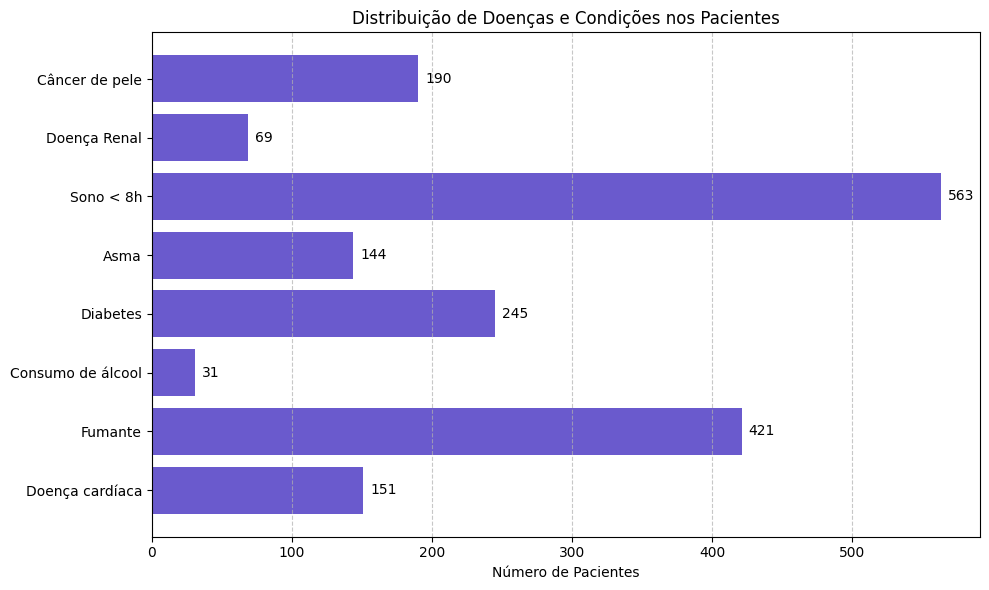

In [13]:
import matplotlib.pyplot as plt

# Dados fornecidos
doencas = {
    "Doença cardíaca": 151,
    "Fumante": 421,
    "Consumo de álcool": 31,
    "Diabetes": 245,
    "Asma": 144,
    "Sono < 8h": 563,
    "Doença Renal": 69,
    "Câncer de pele": 190
}

# Organizar dados
labels = list(doencas.keys())
values = list(doencas.values())

# Criar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color="#6A5ACD")

# Adicionar os valores nas barras
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             str(bar.get_width()), va='center')

# Título e rótulos
plt.xlabel("Número de Pacientes")
plt.title("Distribuição de Doenças e Condições nos Pacientes")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

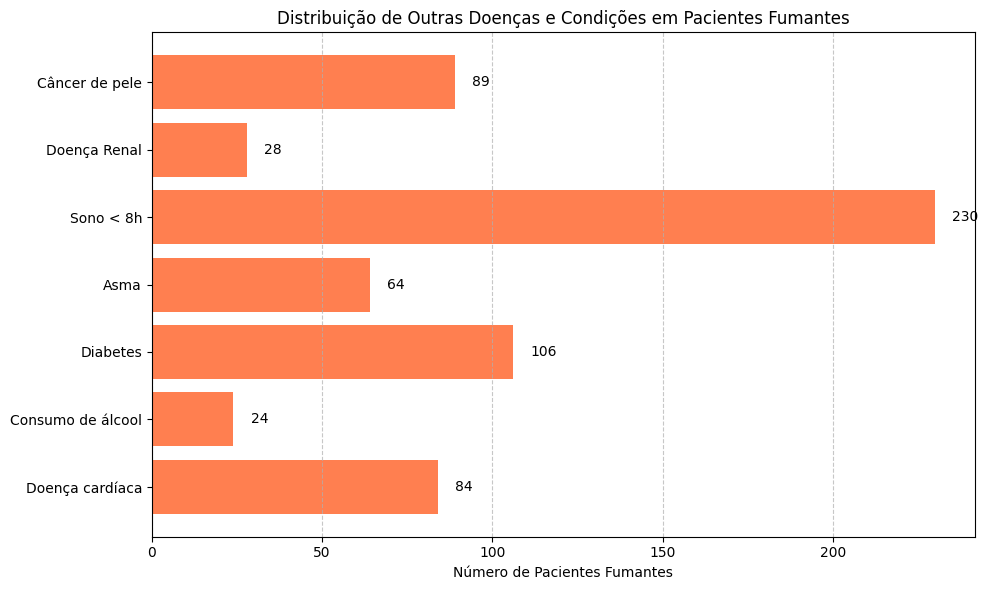

In [17]:
# prompt: poderia gerar um gráfico à partir dos fumantes? ou seja quem é fumante e que também tem as outras doenças

# Filtrar pacientes que são fumantes
fumantes_df = df[df["Fumante"] == "Sim"]

# Contar pacientes fumantes que também têm outras condições
fumantes_com_outras_condicoes = {
    "Doença cardíaca": (fumantes_df["Doenca_cardiaca"] == "Sim").sum(),
    "Consumo de álcool": (fumantes_df["Consumo_alcool"] == "Sim").sum(),
    "Diabetes": (fumantes_df["Diabetes"] == "Sim").sum(),
    "Asma": (fumantes_df["Asma"] == "Sim").sum(),
    "Sono < 8h": (fumantes_df["Horas_sono"] < 8).sum(),
    "Doença Renal": (fumantes_df["Doenca_renal"] == "Sim").sum(),
    "Câncer de pele": (fumantes_df["Cancer_pele"] == "Sim").sum()
}

# Organizar dados para o gráfico
labels_fumantes = list(fumantes_com_outras_condicoes.keys())
values_fumantes = list(fumantes_com_outras_condicoes.values())

# Criar gráfico de barras horizontais para fumantes com outras condições
plt.figure(figsize=(10, 6))
bars_fumantes = plt.barh(labels_fumantes, values_fumantes, color="#FF7F50")

# Adicionar os valores nas barras
for bar in bars_fumantes:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             str(bar.get_width()), va='center')

# Título e rótulos
plt.xlabel("Número de Pacientes Fumantes")
plt.title("Distribuição de Outras Doenças e Condições em Pacientes Fumantes")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Carregar os dados
df = pd.read_json("pacientes.json")

# Filtrar pacientes com menos de 8 horas de sono
df_sono = df[df["Horas_sono"] < 8]

# Criar colunas booleanas para as outras doenças
condicoes = {
    "Doença cardíaca": (df_sono["Doenca_cardiaca"] == "Sim"),
    "Fumante": (df_sono["Fumante"] == "Sim"),
    "Consumo de álcool": (df_sono["Consumo_alcool"] == "Sim"),
    "Diabetes": (df_sono["Diabetes"] == "Sim"),
    "Asma": (df_sono["Asma"] == "Sim"),
    "Doença Renal": (df_sono["Doenca_renal"] == "Sim"),
    "Câncer de pele": (df_sono["Cancer_pele"] == "Sim")
}

# Contar quantos pacientes com sono < 8 têm cada uma dessas condições
print("Pacientes com sono < 8h e outras doenças:")
for condicao, filtro in condicoes.items():
    print(f"- {condicao}: {filtro.sum()} pacientes")


Pacientes com sono < 8h e outras doenças:
- Doença cardíaca: 77 pacientes
- Fumante: 230 pacientes
- Consumo de álcool: 19 pacientes
- Diabetes: 139 pacientes
- Asma: 86 pacientes
- Doença Renal: 39 pacientes
- Câncer de pele: 110 pacientes


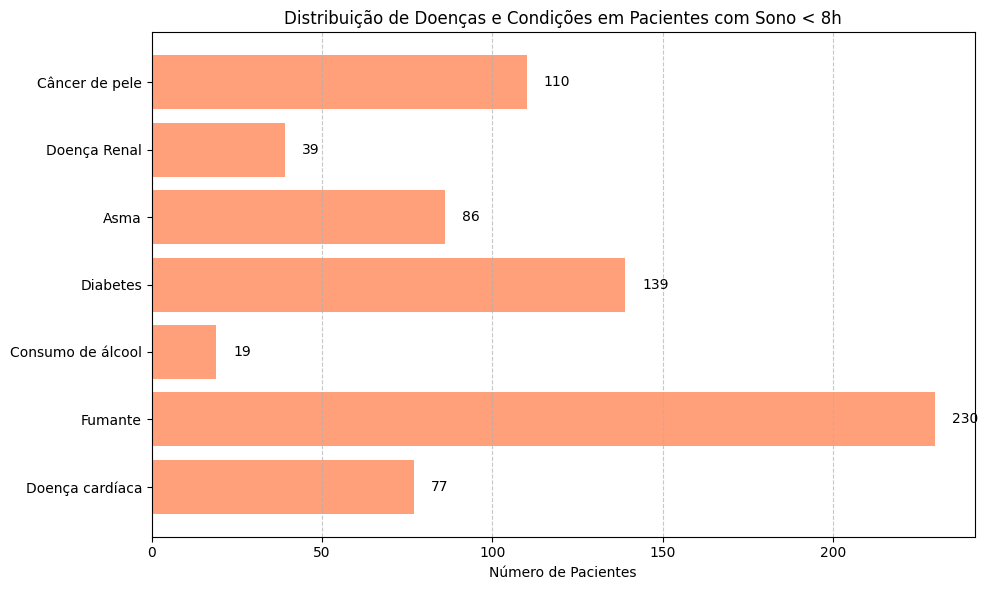

In [16]:
# prompt: poderia gerar um grafico destes pacientes?
# Pacientes com sono < 8h e outras doenças:
# - Doença cardíaca: 77 pacientes
# - Fumante: 230 pacientes
# - Consumo de álcool: 19 pacientes
# - Diabetes: 139 pacientes
# - Asma: 86 pacientes
# - Doença Renal: 39 pacientes
# - Câncer de pele: 110 pacientes

# Dados fornecidos (já filtrados para pacientes com sono < 8h)
doencas_sono = {
    "Doença cardíaca": 77,
    "Fumante": 230,
    "Consumo de álcool": 19,
    "Diabetes": 139,
    "Asma": 86,
    "Doença Renal": 39,
    "Câncer de pele": 110
}

# Organizar dados
labels_sono = list(doencas_sono.keys())
values_sono = list(doencas_sono.values())

# Criar gráfico de barras horizontais para pacientes com sono < 8h
plt.figure(figsize=(10, 6))
bars_sono = plt.barh(labels_sono, values_sono, color="#FFA07A")

# Adicionar os valores nas barras
for bar in bars_sono:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             str(bar.get_width()), va='center')

# Título e rótulos
plt.xlabel("Número de Pacientes")
plt.title("Distribuição de Doenças e Condições em Pacientes com Sono < 8h")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()